In [3]:
'''
Full d'anàlisi de dades, corresponent a la pràctica 1a
Transport de calor en una barra metàl·lica
RÈGIM ESTACIONARI, T(0) = constant
Carles Falcó i Gandia
'''

from numpy import array, mean, std, sqrt, log, linspace, exp, polyfit, diag, load
from scipy.stats import linregress

import matplotlib.pyplot as plt

from matplotlib import rcParams

In [4]:
# DISTÀNCIES ENTRE FORATS
T_lab = 22.7
u_L_inst = 0.005

dist_forats_ar = array([9.525,9.33,9.32,9.265,9.63,9.26,9.335,9.320]) # cm
dist_forats = mean(dist_forats_ar)
u_dist_forats = sqrt((std(dist_forats_ar)/sqrt(len(dist_forats_ar)))**2 + u_L_inst**2)

diam_forat = .590 # cm
u_diam_forat = .005

# Distància entre forats + diàmetre forat
dist = dist_forats + diam_forat
u_dist = sqrt(u_dist_forats**2 + u_diam_forat**2)
print(dist, u_dist)

(9.963125, 0.04431719386282264)


In [6]:
# TEMPERATURES A CADA FORAT
# 1,2,3 representen cada metall

n_forats = 12
dspan = array([dist*i for i in range(0,12)])

T1 = array([126.3, 79.9, 53, 39.2, 31.9, 28, 25.9, 24.8, 24.2, 23.9, 23.8, 23.7]) # ºC # FERRO
T2 = array([134.9, 98.4, 73.4, 56.1, 45.4, 37.7, 32.5, 29.3, 27.3, 26.1, 25.4, 25.1]) # LLAUTÓ
T3 = array([148.2, 112.1, 88.4, 71, 58.2, 49.1, 42.4, 37.9, 34.6, 32.4, 31.0, 30.1]) # ALUMINI
u_T = 0.1

# DIÀMETRES

D1 = 3.015 # cm
D2 = 3.035
D3 = 3.030
print(T1+273)
print(T2+273)
print(T3+273)
dspan[-1]

[399.3 352.9 326.  312.2 304.9 301.  298.9 297.8 297.2 296.9 296.8 296.7]
[407.9 371.4 346.4 329.1 318.4 310.7 305.5 302.3 300.3 299.1 298.4 298.1]
[421.2 385.1 361.4 344.  331.2 322.1 315.4 310.9 307.6 305.4 304.  303.1]


109.594375

LinregressResult(slope=-0.044266280152145905, intercept=4.207058872215298, rvalue=-0.9769953201394639, pvalue=4.882102060228571e-08, stderr=0.003055564547219322)
LinregressResult(slope=-0.036938237469912795, intercept=4.615775055382638, rvalue=-0.9951560889350114, pvalue=2.0831569331545614e-11, stderr=0.0011539087955802307)
LinregressResult(slope=-0.026588816930697916, intercept=4.690256344902104, rvalue=-0.9934883095152872, pvalue=9.120111253242094e-11, stderr=0.0009642507248610785)


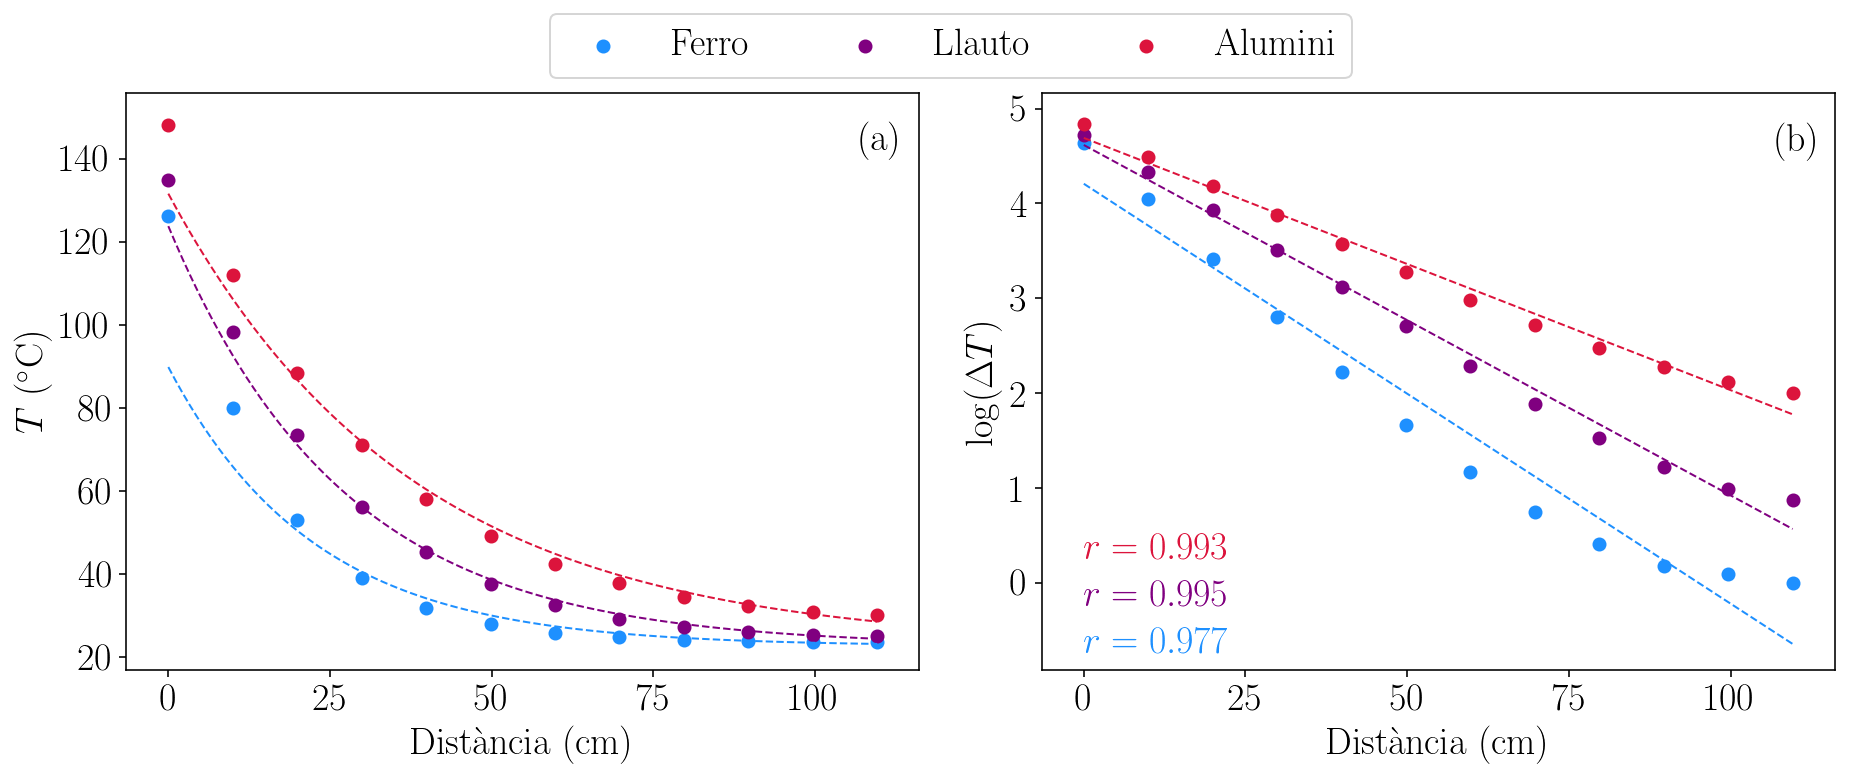

In [68]:
dspan2 = linspace(dspan[0],dspan[-1],100)

reg_T1_1 = linregress(dspan,log(T1-T_lab))
reg_T2_1 = linregress(dspan,log(T2-T_lab))
reg_T3_1 = linregress(dspan,log(T3-T_lab))

print(reg_T1_1)
print(reg_T2_1)
print(reg_T3_1)

rcParams.update({'font.size': 19})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,5))
fig.tight_layout()

ax1.set_ylabel('$T$ ($^\circ$C)')
ax1.set_xlabel('Dist\`ancia (cm)')

ax2.set_ylabel('$\log(\Delta T)$')
ax2.set_xlabel('Dist\`ancia (cm)')

ax1.scatter(dspan,T1,color = 'dodgerblue',label = 'Ferro')
ax1.scatter(dspan,T2,color = 'purple',label = u'Llauto')
ax1.scatter(dspan,T3,color = 'crimson',label = 'Alumini')
ax1.plot(dspan2,T_lab + exp(reg_T1_1[0]*dspan2 + reg_T1_1[1]), color = 'dodgerblue', linewidth = 1, linestyle = '--')
ax1.plot(dspan2,T_lab + exp(reg_T2_1[0]*dspan2 + reg_T2_1[1]), color = 'purple', linewidth = 1, linestyle = '--')
ax1.plot(dspan2,T_lab + exp(reg_T3_1[0]*dspan2 + reg_T3_1[1]), color = 'crimson', linewidth = 1, linestyle = '--')

ax2.scatter(dspan,log(T1 - T_lab),color = 'dodgerblue')
ax2.scatter(dspan,log(T2 - T_lab),color = 'purple')
ax2.scatter(dspan,log(T3 - T_lab),color = 'crimson')
ax2.plot(dspan2,reg_T1_1[0]*dspan2 + reg_T1_1[1], color = 'dodgerblue', linewidth = 1, linestyle = '--')
ax2.plot(dspan2,reg_T2_1[0]*dspan2 + reg_T2_1[1], color = 'purple', linewidth = 1, linestyle = '--')
ax2.plot(dspan2,reg_T3_1[0]*dspan2 + reg_T3_1[1], color = 'crimson', linewidth = 1, linestyle = '--')

ax1.text(107,142,'(a)')
ax2.text(107,4.55,'(b)')

ax2.text(0,-0.75,'$r = %.3lf$' % (-reg_T1_1[2]), color = 'dodgerblue')
ax2.text(0,-0.25,'$r = %.3lf$' % (-reg_T2_1[2]), color = 'purple')
ax2.text(0,0.25,'$r = %.3lf$' % (-reg_T3_1[2]), color = 'crimson')
ax1.legend(loc = 'upper center',ncol = 3, bbox_to_anchor=[1.04, 1.17])
plt.savefig('fig_es_1.pdf',bbox_inches = 'tight')
#plt.show()

In [69]:
Krel_llauto_ferro = (reg_T1_1[0]/reg_T2_1[0])**2*D2/D1
Krel_alumini_ferro = (reg_T1_1[0]/reg_T3_1[0])**2*D3/D1
print(Krel_llauto_ferro, Krel_alumini_ferro)

(1.4456564475611011, 2.7855011421457005)


In [70]:
pr1, covv1 = polyfit(dspan,log(T1-T_lab),1,cov = True)
pr2, covv2 = polyfit(dspan,log(T2-T_lab),1,cov = True)
pr3, covv3 = polyfit(dspan,log(T3-T_lab),1,cov = True)

k_21 = (pr1[0]/pr2[0])**2*D2/D1
u_k21 = k_21*sqrt( (2*sqrt(covv2[0][0])/pr2[0])**2 + (2*sqrt(covv1[0][0])/pr1[0])**2 + (u_L_inst/D1)**2 + (u_L_inst/D2)**2 )
k_31 = (pr1[0]/pr3[0])**2*D3/D1
u_k31 = k_31*sqrt( (2*sqrt(covv3[0][0])/pr3[0])**2 + (2*sqrt(covv1[0][0])/pr1[0])**2 + (u_L_inst/D1)**2 + (u_L_inst/D3)**2 )
print(k_21,u_k21)
print(k_31,u_k31)

(1.445656447561102, 0.24494544747523037)
(2.7855011421457054, 0.48570782176750993)


In [71]:
linregress(dspan,log(T1-T_lab))

LinregressResult(slope=-0.044266280152145905, intercept=4.207058872215298, rvalue=-0.9769953201394639, pvalue=4.882102060228571e-08, stderr=0.003055564547219322)

In [72]:
K_ferro = 79.5
u_K_ferro = 0.1
K_alumini = K_ferro*k_31
u_K_alumini = K_alumini*sqrt((u_K_ferro/K_ferro)**2 + (u_k31/k_31)**2)
K_llauto = K_ferro*k_21
u_K_llauto = K_llauto*sqrt((u_K_ferro/K_ferro)**2 + (u_k21/k_21)**2)
print(K_llauto,u_K_llauto)
print(K_alumini,u_K_alumini)
lam = pr1[0]**2*K_ferro*D1/4*100
ulam = lam*sqrt(4*covv1[0][0]/pr1[0]**2 + 0.1**2/K_ferro**2)
print(lam,ulam)

(114.92968758110761, 19.47369968298725)
(221.4473408005836, 38.61477651295369)
(11.741957667443579, 1.812418004253325)


In [73]:
def give_AB(T):
    p, covv = polyfit(dspan,log(T-T_lab),1,cov = True)
    dcov = sqrt(diag(covv))
    return array([-p[0]*100, exp(p[1])]), array([dcov[0]*100,exp(p[1])*dcov[1]])
print(give_AB(T1))
print(give_AB(T2))
print(give_AB(T3))

(array([ 4.42662802, 67.15872666]), array([ 0.3416225, 14.8432546]))
(array([  3.69382375, 101.06613003]), array([0.12901093, 8.43552935]))
(array([  2.65888169, 108.88108734]), array([0.10780651, 7.5941233 ]))


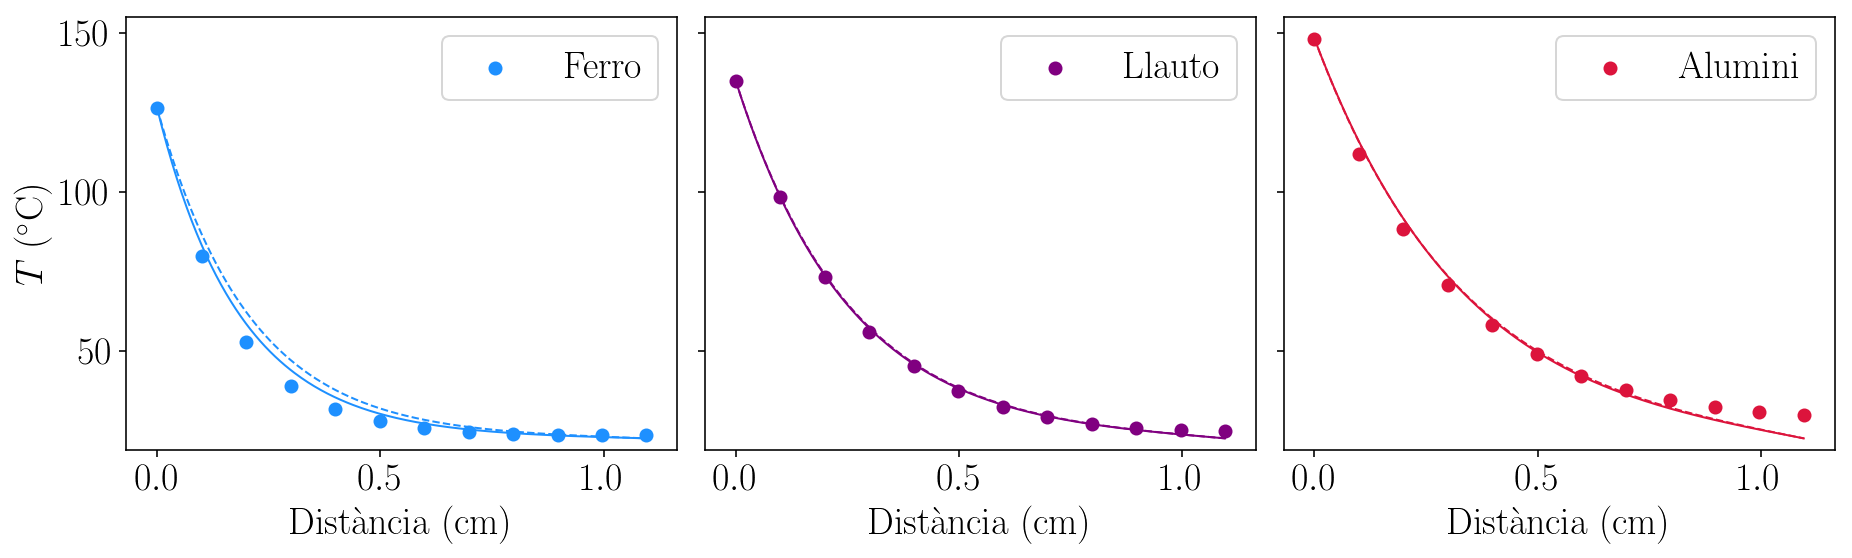

In [75]:


sol_fe_simple = load('estacionari_ferro_simple.npy')
sol_fe_full = load('estacionari_ferro_full.npy')
sol_ll_simple = load('estacionari_llauto_simple.npy')
sol_ll_full = load('estacionari_llauto_full.npy')
sol_al_simple = load('estacionari_alumini_simple.npy')
sol_al_full = load('estacionari_alumini_full.npy')
xspan_s = linspace(dspan[0],dspan[-1],len(sol_fe_simple))
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (13,4))
fig.tight_layout()
plt.subplots_adjust(wspace = 0.05)

ax1.plot(xspan_s/100,sol_fe_simple - 273, linewidth = 1, color = 'dodgerblue', linestyle = '--')
ax1.plot(xspan_s/100,sol_fe_full - 273, linewidth = 1, color = 'dodgerblue')
ax1.scatter(dspan/100, T1, color = 'dodgerblue', label = 'Ferro')
ax1.set_ylim(19,155)
ax1.set_ylabel('$T\;(^\circ$C)')
ax1.set_xlabel('Dist\`ancia (cm)')
ax1.legend()

ax2.plot(xspan_s/100,sol_ll_simple - 273, linewidth = 1, color = 'purple', linestyle = '--')
ax2.plot(xspan_s/100,sol_ll_full - 273, linewidth = 1, color = 'purple')
ax2.scatter(dspan/100, T2, color = 'purple', label = 'Llauto')
ax2.set_ylim(19,155)
ax2.set_yticklabels([''])
ax2.set_xlabel('Dist\`ancia (cm)')
ax2.legend()

ax3.plot(xspan_s/100,sol_al_simple - 273, linewidth = 1, color = 'crimson', linestyle = '--')
ax3.plot(xspan_s/100,sol_al_full - 273, linewidth = 1, color = 'crimson')
ax3.scatter(dspan/100, T3, color = 'crimson', label = 'Alumini')
ax3.set_ylim(19,155)
ax3.set_yticklabels([''])
ax3.set_xlabel('Dist\`ancia (cm)')
ax3.legend()

plt.savefig('simu1.pdf',bbox_inches = 'tight')
plt.show()

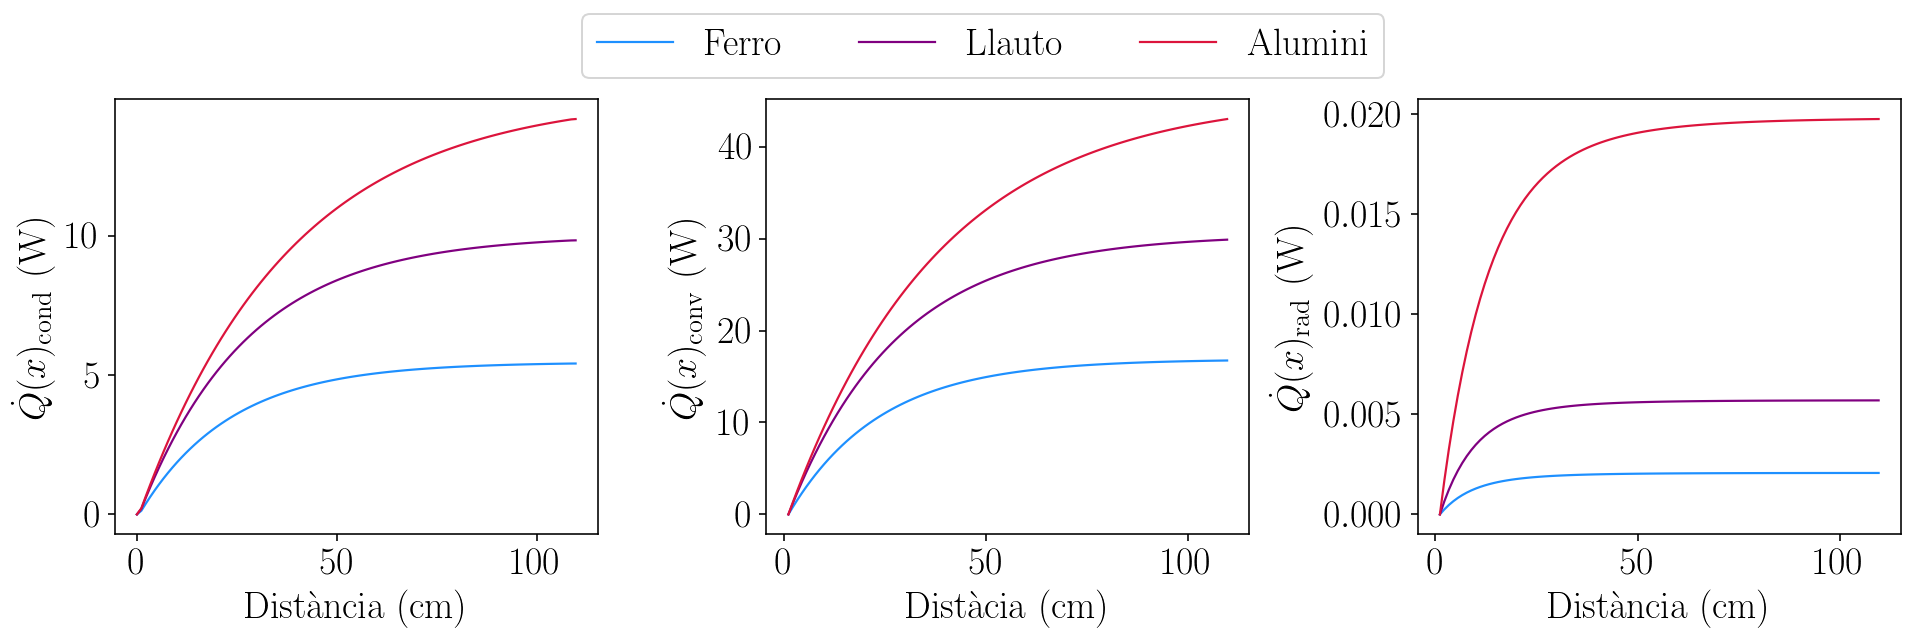

In [53]:
from numpy import gradient, trapz
from math import pi
sigma =  5.670374419*1e-8

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (16,4))
plt.subplots_adjust(wspace = 0.35)
t1b = T_lab + exp(reg_T1_1[0]*dspan2 + reg_T1_1[1])
t2b = T_lab + exp(reg_T2_1[0]*dspan2 + reg_T2_1[1])
t3b = T_lab + exp(reg_T3_1[0]*dspan2 + reg_T3_1[1])

ax1.plot(dspan2, K_ferro*pi*D1/100/4*(gradient(t1b,dspan2) - gradient(t1b,dspan2)[0]), color = 'dodgerblue',linewidth = 1.1, label = 'Ferro')
ax1.plot(dspan2, K_llauto*pi*D2/100/4*(gradient(t2b,dspan2) - gradient(t2b,dspan2)[0]), color = 'purple', linewidth = 1.1, label = 'Llauto')
ax1.plot(dspan2, K_alumini*pi*D3/100/4*(gradient(t3b,dspan2) - gradient(t3b,dspan2)[0]), color = 'crimson', linewidth = 1.1, label = 'Alumini')

ax2.plot(dspan2[1:], [lam*D1/100*pi*trapz(t1b[:i]-T_lab,dspan2[:i]/100) for i in range(1,len(dspan2))], linewidth = 1.1, color = 'dodgerblue')
ax2.plot(dspan2[1:], [lam*D1/100*pi*trapz(t2b[:i]-T_lab,dspan2[:i]/100) for i in range(1,len(dspan2))], linewidth = 1.1, color = 'purple')
ax2.plot(dspan2[1:], [lam*D1/100*pi*trapz(t3b[:i]-T_lab,dspan2[:i]/100) for i in range(1,len(dspan2))], linewidth = 1.1, color = 'crimson')

ax3.plot(dspan2[1:],[0.07*sigma*D1/100*pi*trapz(t1b[:i]**4-T_lab**4,dspan2[:i]/100) for i in range(1,len(dspan2))], linewidth = 1.1, color = 'dodgerblue')
ax3.plot(dspan2[1:],[0.05*sigma*D2/100*pi*trapz(t2b[:i]**4-T_lab**4,dspan2[:i]/100) for i in range(1,len(dspan2))], linewidth = 1.1, color = 'purple')
ax3.plot(dspan2[1:],[0.1*sigma*D3/100*pi*trapz(t3b[:i]**4-T_lab**4,dspan2[:i]/100) for i in range(1,len(dspan2))], linewidth = 1.1, color = 'crimson')

ax1.legend(bbox_to_anchor = [2.67,1.24], ncol = 3)
ax1.set_xlabel('Dist\`ancia (cm)')
ax1.set_ylabel('$\dot{Q}(x)_{\mathrm{cond}}$ (W)')
ax2.set_xlabel('Dist\`acia (cm)')
ax2.set_ylabel('$\dot{Q}(x)_{\mathrm{conv}}$ (W)')
ax3.set_xlabel('Dist\`ancia (cm)')
ax3.set_ylabel('$\dot{Q}(x)_{\mathrm{rad}}$ (W)')
plt.savefig('extra_fig.pdf',bbox_inches = 'tight')

In [29]:
pr1[0]**2*100*D1*K_ferro/4

11.741957667443577

In [29]:
trapz(t1b[:1],dspan2[:1])

0.0

In [7]:
for i in range(len(T1)):
    print('%.i & %.1lf & %.1lf & %.1lf \\\\' % (i + 1, T1[i], T2[i], T3[i]))

1 & 126.3 & 134.9 & 148.2 \
2 & 79.9 & 98.4 & 112.1 \
3 & 53.0 & 73.4 & 88.4 \
4 & 39.2 & 56.1 & 71.0 \
5 & 31.9 & 45.4 & 58.2 \
6 & 28.0 & 37.7 & 49.1 \
7 & 25.9 & 32.5 & 42.4 \
8 & 24.8 & 29.3 & 37.9 \
9 & 24.2 & 27.3 & 34.6 \
10 & 23.9 & 26.1 & 32.4 \
11 & 23.8 & 25.4 & 31.0 \
12 & 23.7 & 25.1 & 30.1 \
